In [34]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import mysql.connector
from dotenv import load_dotenv

load_dotenv()

MYSQL_USER = os.getenv('MYSQL_USER')
MYSQL_PASS = os.getenv('MYSQL_PASS')
MYSQL_HOST = os.getenv('MYSQL_HOST')
MYSQL_DB = os.getenv('MYSQL_DB')

db_config = mysql.connector.connect(
        user= MYSQL_USER,
        password= MYSQL_PASS,
        host= MYSQL_HOST,
        database= MYSQL_DB
)

In [2]:
df = pd.read_sql('''SELECT * FROM ecommerce_events''', con=db_config)
df

C:\Users\rorro\AppData\Local\Temp\ipykernel_43356\3966816047.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''SELECT * FROM ecommerce_events''', con=db_config)


,id,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,1,2019-12-31 00:00:02,cart,5884349,1487580010561667147,NULL,oniq,10.32,595068367,fead2242-beaf-4eb7-8ce0-12a9889e5afc
1,2,2019-12-31 00:00:07,view,6941,1783999064103190764,NULL,runail,4.71,595058034,8ded501d-a883-4006-ae24-618e09f145f1
2,3,2019-12-31 00:00:11,view,5692888,1487580007910867929,NULL,yoko,7.29,595068842,c6f3a1ec-fe2e-48d7-b46d-b98c2a58e7a1
3,4,2019-12-31 00:00:13,view,5662677,1487580011903844485,NULL,irisk,4.44,594965776,8bb41bae-bcc9-4439-be90-88a0b33de56b
4,5,2019-12-31 00:00:20,view,5884355,1487580010561667147,NULL,oniq,10.32,595068367,fead2242-beaf-4eb7-8ce0-12a9889e5afc
...,...,...,...,...,...,...,...,...,...,...
94,95,2019-12-31 00:07:01,view,5832987,1487580009387261981,NULL,NULL,7.14,595066976,d99faaef-1a66-4416-bd73-ba728dcfe0bc
95,96,2019-12-31 00:07:08,view,40090,1487580011383750769,NULL,swarovski,2.06,587941700,afaae5c0-7cd4-463b-b5f9-52cf7a38c4a1
96,97,2019-12-31 00:07:26,view,5690222,1487580013841613016,NULL,estel,2.62,595069918,b6927b20-71f6-4773-b159-3cd52381f29d
97,98,2019-12-31 00:07:27,view,5739057,1487580008263189483,NULL,kapous,4.75,545096777,6d90d98a-5887-41f5-9632-1b9ae21d060d


In [28]:
print(df['price'].mean())
print(df['price'].median())
print(df['price'].mode())


8.833232323232323
4.71
0    3.0
Name: price, dtype: float64


In [37]:
###FRECUENCIAS
frec = pd.crosstab(index=df['price'], columns='frecuencia').head(15)
frec.sort_values(by='frecuencia', ascending=False).head(15)

frec2 = frec.loc[frec.index > 5]['frecuencia'].sum()
frec

col_0,frecuencia
price,
0.25,1
0.87,1
0.95,1
1.59,1
1.90,3
2.06,1
2.22,3
2.62,2
3.00,11


<Axes: ylabel='frecuencia'>

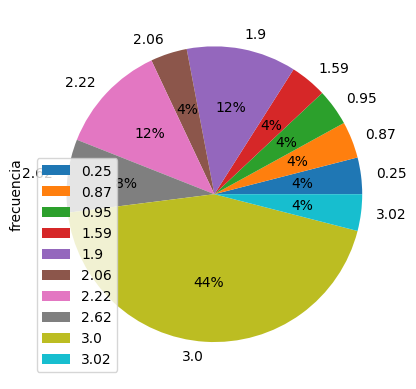

In [44]:
graf_info = pd.crosstab(index=df['price'], columns='frecuencia').head(10).plot(kind='pie', y='frecuencia', autopct='%1.0f%%')
graf_info

([<matplotlib.patches.Wedge at 0x23210f07ad0>,
 [Text(0.19101298416420226, 1.083288530300532, 'Aprobados'),
  Text(-0.19101288273940956, -1.0832885481844534, 'Suspensos')],
 [Text(0.10418890045320121, 0.5908846528911992, '44.4%'),
  Text(-0.10418884513058702, -0.5908846626460654, '55.6%')])

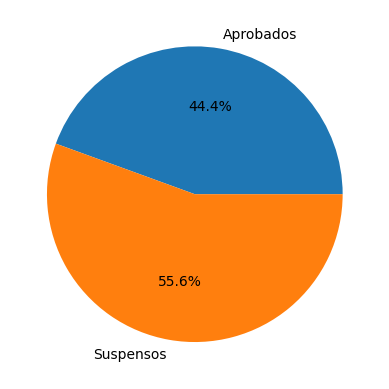

In [49]:
new = pd.crosstab(index=df['price'], columns='frecuencia')
aprobados = new.loc[new.index >= 5]["frecuencia"].sum()
suspensos = new.loc[new.index < 5]["frecuencia"].sum()

data = np.array([aprobados,suspensos])
res=plt.pie(data,labels=["Aprobados","Suspensos"],autopct="%1.1f%%")
res

In [9]:
df.filter(like='p', axis=1)

,event_type,product_id,price
0,cart,5884349,10.32
1,view,6941,4.71
2,view,5692888,7.29
3,view,5662677,4.44
4,view,5884355,10.32
...,...,...,...
94,view,5832987,7.14
95,view,40090,2.06
96,view,5690222,2.62
97,view,5739057,4.75


In [15]:
##### AGRUPACIONES
grouped_df = df.groupby('product_id').agg(
    product_count=('product_id', 'size'),  # Count product_id occurrences
    total_price=('price', 'sum')  # Sum of the price column
)

grouped_df2 = grouped_df.sort_values(by='product_count', ascending=False).head(5)
grouped_df2


,product_count,total_price
product_id,,
4591,3,17.85
5726126,3,6.66
5662677,3,13.32
6941,2,9.42
5649518,2,12.70


In [18]:
gr = df.groupby('event_type').agg(
    product_count=('product_id', 'size'),
    total_price=('price', 'sum')
)
gr.sort_values(by='product_count', ascending=False)

,product_count,total_price
event_type,,
view,62,630.65
purchase,17,114.01
cart,13,76.35
remove_from_cart,7,53.48


In [24]:
unicos = df['event_type'].unique()
#unicos2 = df.filter('event_type').drop_duplicates()
unicos

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)